<a href="https://colab.research.google.com/github/archiechang/study/blob/master/Data%20Analytics/Data%20100/31-40/31_40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# ノック31：データを読み込んで確認しよう

In [4]:
uselog=pd.read_csv("https://raw.githubusercontent.com/archiechang/study/master/Data%20Analytics/Data%20100/31-40/use_log.csv")

In [5]:
uselog.isnull().sum()

log_id         0
customer_id    0
usedate        0
dtype: int64

In [8]:
customer=pd.read_csv("https://raw.githubusercontent.com/archiechang/study/master/Data%20Analytics/Data%20100/31-40/customer_join.csv")

In [9]:
customer.isnull().sum()

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64

# ノック32：クラスタリングで顧客をグループ化しよう

In [11]:
customer_clustering=customer[["mean","median","max","min","membership_period"]]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [17]:
#標準化
sc=StandardScaler()
customer_clustering_sc=sc.fit_transform(customer_clustering)

In [19]:
kmeans=KMeans(n_clusters=4,random_state=0)
clusters=kmeans.fit(customer_clustering_sc)

In [24]:
customer_clustering["cluster"]=clusters.labels_
print(customer_clustering["cluster"].unique())
customer_clustering.head()

[3 1 0 2]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,3
1,5.083333,5.0,7,3,47,3
2,4.583333,5.0,6,3,47,3
3,4.833333,4.5,7,2,47,3
4,3.916667,4.0,6,1,47,3


# ノック33：クラスタリング結果を分析しよう

In [25]:
customer_clustering.columns=["月内平均値","月内中央値","月内最大値","月内最小値","会員期間","cluster"]
customer_clustering.groupby("cluster").count()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,1334,1334,1334,1334,1334
1,763,763,763,763,763
2,846,846,846,846,846
3,1249,1249,1249,1249,1249


In [26]:
customer_clustering.groupby("cluster").mean()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,5.524239,5.375187,8.745877,2.687406,14.843328
1,3.054713,2.888598,4.756225,1.653997,9.263434
2,8.054608,8.039598,10.009456,6.160757,7.072104
3,4.677494,4.671337,7.232986,2.153723,36.915933


# ノック34：クラスタリング結果を可視化してみよう

In [27]:
from sklearn.decomposition import PCA

In [29]:
X=customer_clustering_sc
pca=PCA(n_components=2)
pca.fit(X)
x_pca=pca.transform(X)
pca_df=pd.DataFrame(x_pca)
pca_df["cluster"]=customer_clustering["cluster"]

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

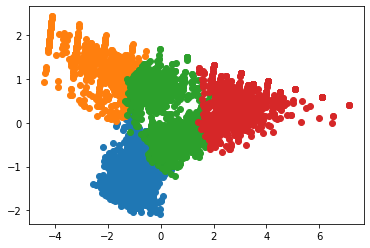

In [41]:
for i in customer_clustering["cluster"].unique():
    tmp=pca_df.loc[pca_df["cluster"]==i]
    plt.scatter(tmp[0],tmp[1])

4

,0,1,cluster
0,-0.819982,-1.959097,3
1,-0.707922,-1.799857,3
2,-1.061499,-1.659826,3
3,-1.160764,-1.810139,3
4,-2.017132,-1.670101,3
...,...,...,...
4187,3.027933,1.139635,2
4188,5.064720,0.769684,2
4189,3.027933,1.139635,2
4190,6.083114,0.584708,2
